In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

# ML Packages
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score 
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

In [3]:
df=pd.read_csv(r"C:\Users\companySetting")
df

,company,reviews,sentiment
0,IBM,great company fantasy trade program great company,1
1,IBM,good pay learn lot review,1
2,IBM,disclaim lot write course depend work area man...,1
3,IBM,culture general thought ethics open driven col...,1
4,IBM,manage constant belittl employe cause damage m...,0
...,...,...,...
22815,Dell Technologies,flexible work schedule good pay lot inter adva...,1
22816,Dell Technologies,well know far move duc merit qualify post stil...,0
22817,Dell Technologies,fun young good pay great train great place sta...,1
22818,Dell Technologies,great benefit great people great company work ...,1


<AxesSubplot: xlabel='sentiment', ylabel='count'>

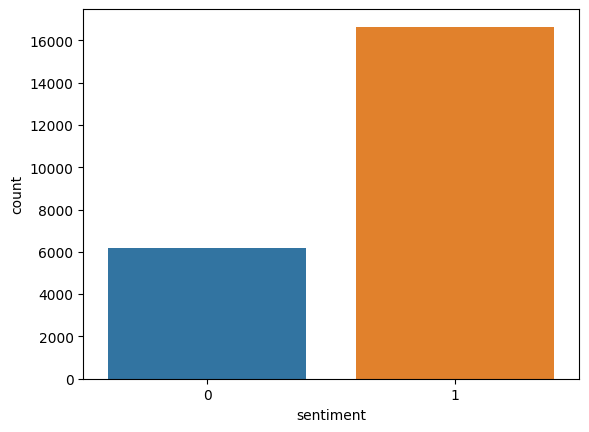

In [6]:
sns.countplot(x='sentiment',data=df)

Let's take only the necessary columns and perform our ML operation

In [7]:
data = df[['sentiment','reviews']]
data

,sentiment,reviews
0,1,great company fantasy trade program great company
1,1,good pay learn lot review
2,1,disclaim lot write course depend work area man...
3,1,culture general thought ethics open driven col...
4,0,manage constant belittl employe cause damage m...
...,...,...
22815,1,flexible work schedule good pay lot inter adva...
22816,0,well know far move duc merit qualify post stil...
22817,1,fun young good pay great train great place sta...
22818,1,great benefit great people great company work ...


In [8]:
X = data.reviews
y = data.sentiment

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english') # removing stop words

# Applying CountVectorizer to train and test datasets
X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names_out()).head()

,aaaaaamaz,ab,abandon,abbe,abc,abject,ablest,abound,abroad,abrupt,...,youngster,youth,youuuu,yuma,zealous,zero,zeus,zone,zuckerberg,zuckerburg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# 2'li N-Gram yöntemini kullanarak tokenize etme
cv2 = CountVectorizer(ngram_range=(2,2), binary=True, stop_words='english')

X_train_cv2 = cv2.fit_transform(X_train)
X_test_cv2  = cv2.transform(X_test)

pd.DataFrame(X_train_cv2.toarray(), columns=cv2.get_feature_names_out()).head

<bound method NDFrame.head of        aaaaaamaz holiday  ab money  ab post  ab ribs  ab teller  \
0                      0         0        0        0          0   
1                      0         0        0        0          0   
2                      0         0        0        0          0   
3                      0         0        0        0          0   
4                      0         0        0        0          0   
...                  ...       ...      ...      ...        ...   
15969                  0         0        0        0          0   
15970                  0         0        0        0          0   
15971                  0         0        0        0          0   
15972                  0         0        0        0          0   
15973                  0         0        0        0          0   

       abandon aspect  abandon bureaucracy  abandon goal  abandon luck  \
0                   0                    0             0             0   
1                

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# Kelimelere ayırarak oluşturulan DataFrame
lr.fit(X_train_cv1, y_train)
y_pred_cv1 = lr.predict(X_test_cv1)
y_pred_cv1

c:\Users\kezer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [16]:
# 2'li N-Gram yöntemi kullanılarak oluşturulan DataFrame
lr.fit(X_train_cv2, y_train)
y_pred_cv2 = lr.predict(X_test_cv2)
y_pred_cv2

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def conf_matrix(actual, predicted):
    plt.figure(figsize=[8,8])
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'], annot=True,
                fmt='d', annot_kws={'fontsize':35}, cmap="YlGnBu", square=True);

    accuracy = accuracy_score(actual, predicted)
    precision = precision_score(actual, predicted, pos_label=0, zero_division=1)
    recall = recall_score(actual, predicted, pos_label=0, zero_division=1)
    f1 = f1_score(actual, predicted, pos_label=0, zero_division=1)
    # pos_label parametresi precision, recall ve f1 score unu görmek istediğimiz labelı soruyor
    # zero_division parametresi 0'a bölme işlemini gerçekleşirse uyarı verip vermeyeceğini soruyor (1=uyarı verme)

    cm_results = [accuracy, precision, recall, f1]
    return cm_results

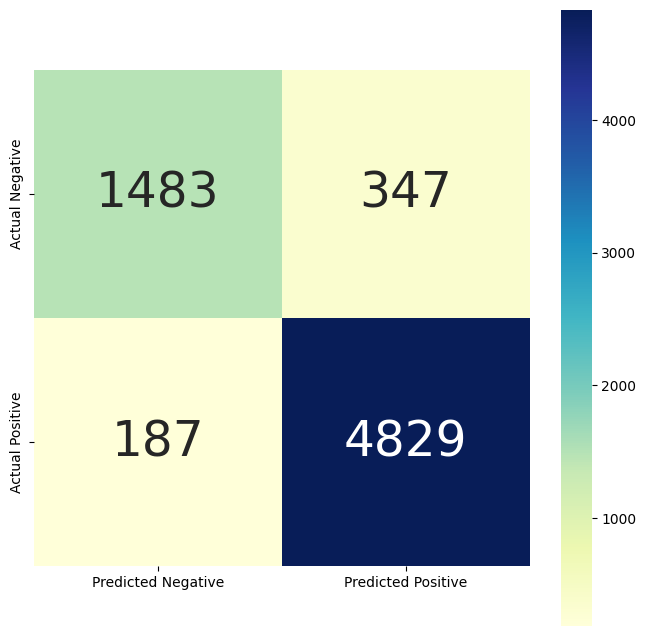

In [18]:
# İlk modelimizden elde ettiğimiz hata matrisi
cm1 = conf_matrix(y_test, y_pred_cv1)

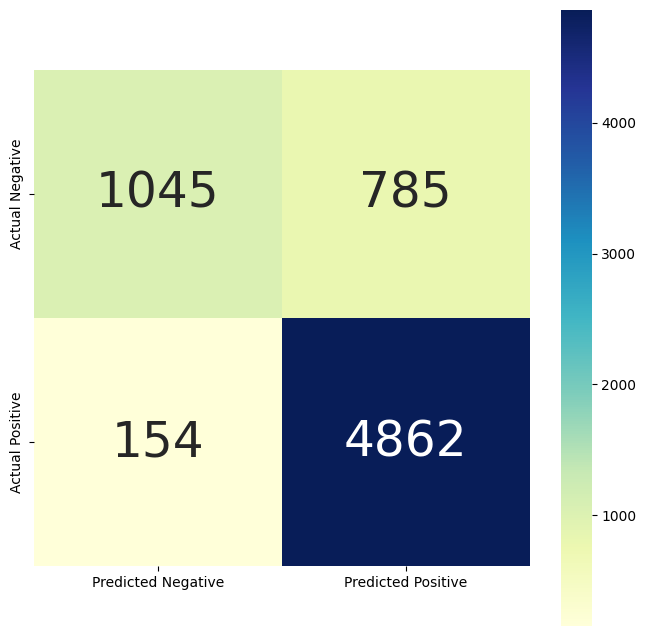

In [19]:
# İkinci modelimizden elde ettiğimiz hata matrisi
cm2 = conf_matrix(y_test, y_pred_cv2)

In [20]:
results = pd.DataFrame(list(zip(cm1, cm2)))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['LR(Word)-CV', 'LR(N-Grams)-CV']
results

,LR(Word)-CV,LR(N-Grams)-CV
Accuracy,0.921998,0.862840
Precision,0.888024,0.871560
Recall,0.810383,0.571038
F1 Score,0.847429,0.689997


In [21]:
# İlk olarak MultinomialNB algoritmasıyla modellerimizi eğitelim
from sklearn.naive_bayes import MultinomialNB

mnb1 = MultinomialNB()
mnb1.fit(X_train_cv1, y_train)

mnb2 = MultinomialNB()
mnb2.fit(X_train_cv2, y_train)

y_pred_cv1_mnb = mnb1.predict(X_test_cv1)
y_pred_cv2_mnb = mnb2.predict(X_test_cv2)

In [22]:
# Ardından da BernoulliNB algoritmasıyla
from sklearn.naive_bayes import BernoulliNB

bnb1 = BernoulliNB()
bnb1.fit(X_train_cv1, y_train)

bnb2 = BernoulliNB()
bnb2.fit(X_train_cv2, y_train)

y_pred_cv1_bnb = bnb1.predict(X_test_cv1)
y_pred_cv2_bnb = bnb2.predict(X_test_cv2)

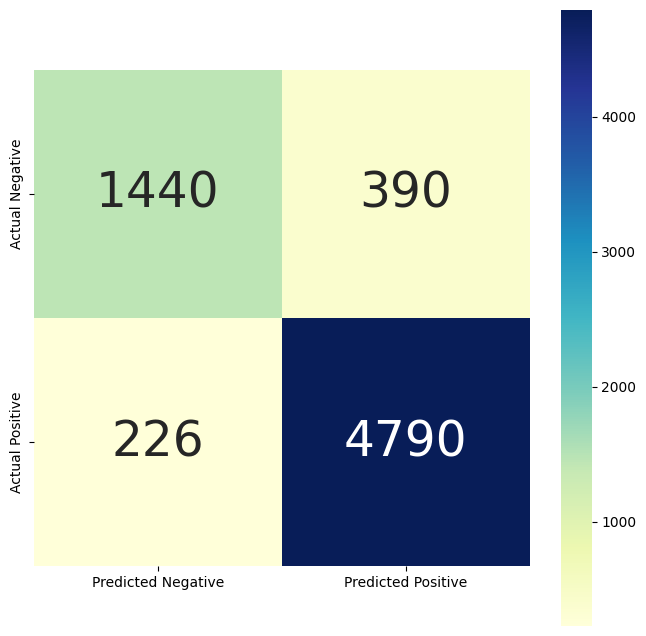

In [23]:
# MultinomialNB & Kelime
cm3 = conf_matrix(y_test, y_pred_cv1_mnb)

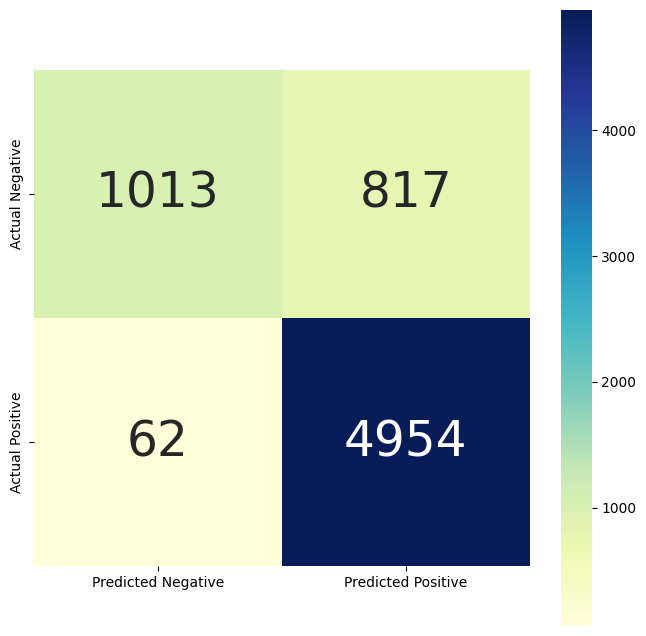

In [24]:
# MultinomialNB & 2'li N-Grams
cm4 = conf_matrix(y_test, y_pred_cv2_mnb)

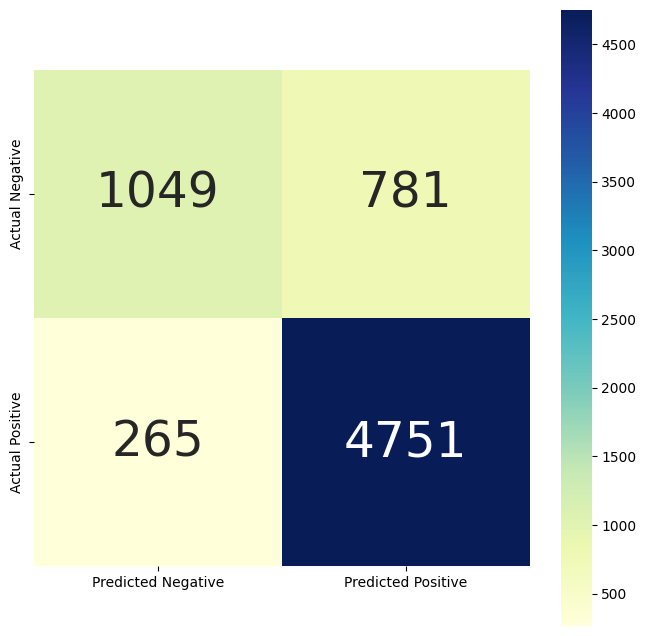

In [25]:
# BernoulliNB & Kelime
cm5 = conf_matrix(y_test, y_pred_cv1_bnb)

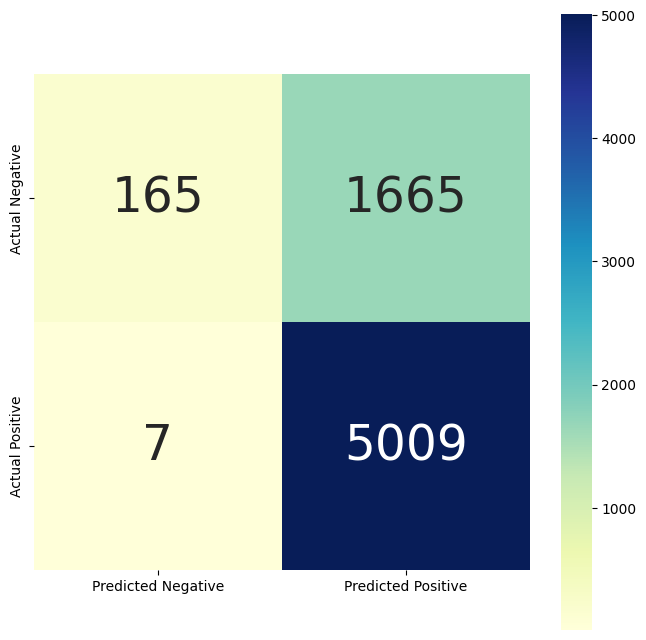

In [26]:
# BernoulliNB & 2'li N-Grams
cm6 = conf_matrix(y_test, y_pred_cv2_bnb)

In [27]:
#TFIDF-Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf1 = TfidfVectorizer(stop_words='english')
X_train_tfidf1 = tfidf1.fit_transform(X_train)
X_test_tfidf1  = tfidf1.transform(X_test)

tfidf2 = TfidfVectorizer(ngram_range=(1,2), binary=True, stop_words='english')
X_train_tfidf2 = tfidf2.fit_transform(X_train)
X_test_tfidf2  = tfidf2.transform(X_test)

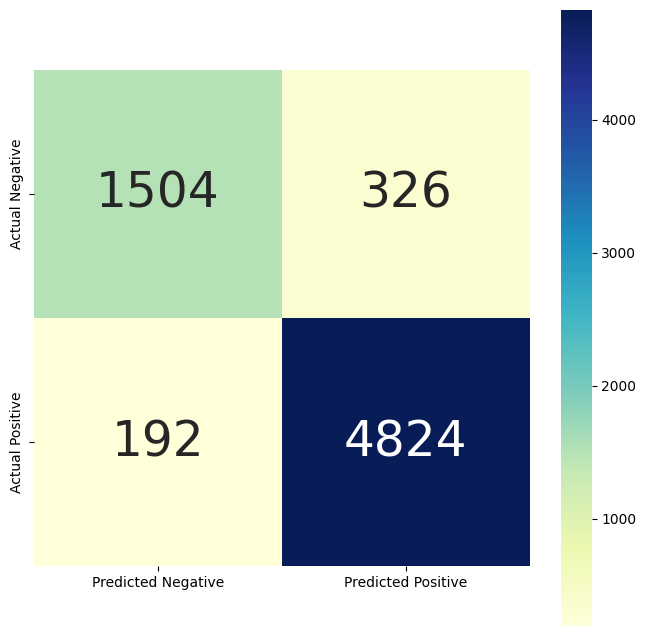

In [28]:
lr.fit(X_train_tfidf1, y_train)
y_pred_tfidf1_lr = lr.predict(X_test_tfidf1)

# Logistic Regresyon & Kelime
cm7 = conf_matrix(y_test, y_pred_tfidf1_lr)

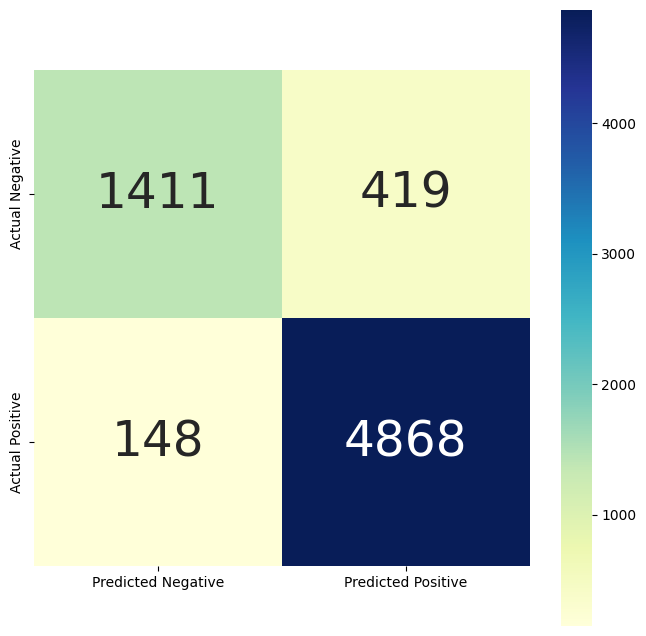

In [29]:
lr.fit(X_train_tfidf2, y_train)
y_pred_tfidf2_lr = lr.predict(X_test_tfidf2)

# Logistic Regresyon & 2'li N-Grams
cm8 = conf_matrix(y_test, y_pred_tfidf2_lr)

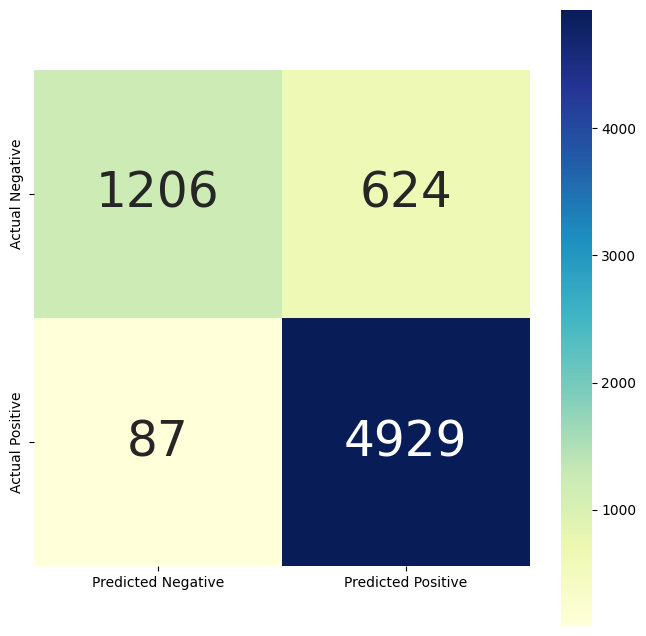

In [30]:
mnb1.fit(X_train_tfidf1.toarray(), y_train)
y_pred_tfidf1_mnb = mnb1.predict(X_test_tfidf1)

# MultinominalNB & Kelime
cm9 = conf_matrix(y_test, y_pred_tfidf1_mnb)

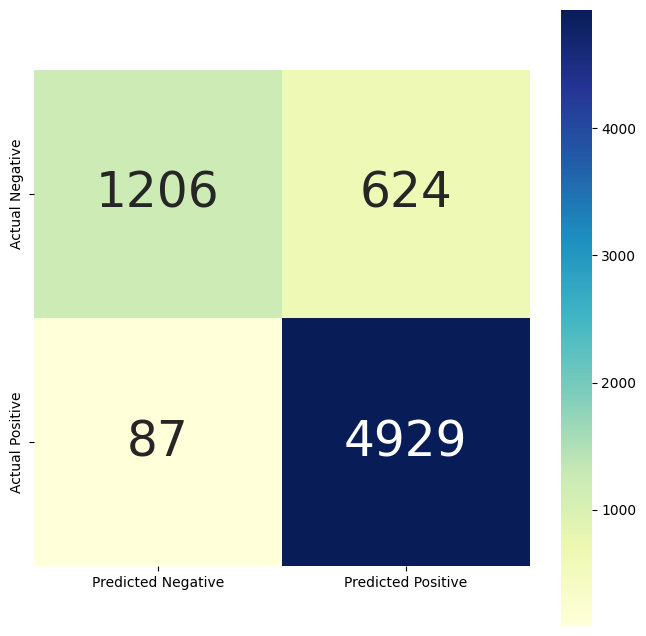

In [31]:
mnb2.fit(X_train_tfidf1.toarray(), y_train)
y_pred_tfidf2_mnb = mnb2.predict(X_test_tfidf1)

# MultinominalNB & 2'li N-Grams
cm10 = conf_matrix(y_test, y_pred_tfidf2_mnb)

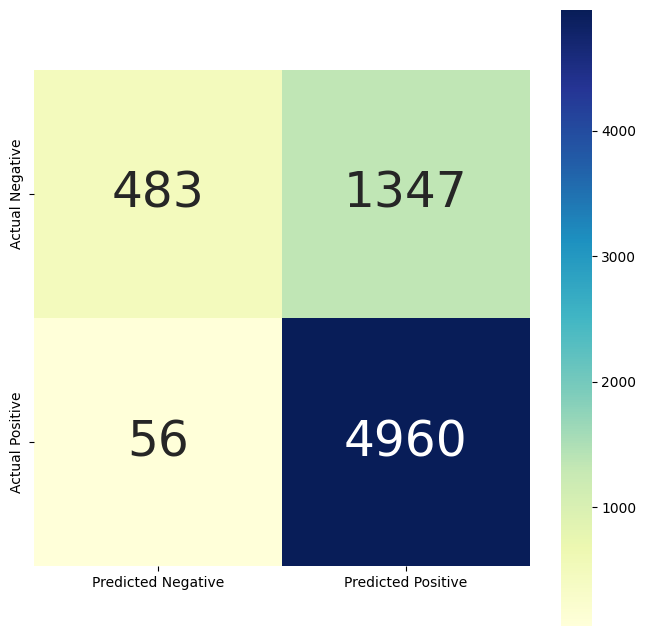

In [32]:
bnb1.fit(X_train_tfidf2.toarray(), y_train)
y_pred_tfidf1_bnb = bnb1.predict(X_test_tfidf2)

# BernoulliNB & Kelime
cm11 = conf_matrix(y_test, y_pred_tfidf1_bnb)

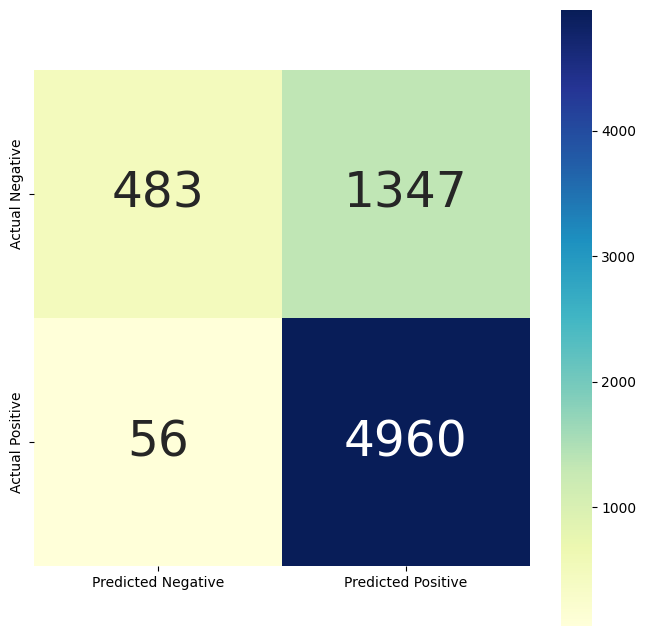

In [33]:
bnb2.fit(X_train_tfidf2.toarray(), y_train)
y_pred_tfidf2_bnb = bnb2.predict(X_test_tfidf2)

# BernoulliNB & 2'li N-Grams
cm12 = conf_matrix(y_test, y_pred_tfidf2_bnb)

In [34]:
results_tf = pd.DataFrame(list(zip(cm1, cm2,cm3, cm4, cm5, cm6, cm7, cm8, cm9, cm10, cm11, cm12)))
results_tf = results_tf.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_tf.columns = ['LR(Word)-CV', 'LR(N-Grams)-CV', 'MNB(Word)-CV', 'MNB(N-Grams)-CV', 'BNB(Word)-CV', 'BNB(N-Grams)-CV','LR(Word)-TFIDF', 'LR(N-Grams)-TFIDF', 'MNB(Word)-TFIDF', 
                      'MNB(N-Grams)-TFIDF', 'BNB(Word)-TFIDF', 'BNB(N-Grams)-TFIDF']
results_tf

results = pd.concat([results, results_tf], axis=1)
results

,LR(Word)-CV,LR(N-Grams)-CV,LR(Word)-CV,LR(N-Grams)-CV,MNB(Word)-CV,MNB(N-Grams)-CV,BNB(Word)-CV,BNB(N-Grams)-CV,LR(Word)-TFIDF,LR(N-Grams)-TFIDF,MNB(Word)-TFIDF,MNB(N-Grams)-TFIDF,BNB(Word)-TFIDF,BNB(N-Grams)-TFIDF
Accuracy,0.921998,0.862840,0.921998,0.862840,0.910020,0.871604,0.847210,0.755770,0.924335,0.917178,0.896144,0.896144,0.795063,0.795063
Precision,0.888024,0.871560,0.888024,0.871560,0.864346,0.942326,0.798326,0.959302,0.886792,0.905067,0.932715,0.932715,0.896104,0.896104
Recall,0.810383,0.571038,0.810383,0.571038,0.786885,0.553552,0.573224,0.090164,0.821858,0.771038,0.659016,0.659016,0.263934,0.263934
F1 Score,0.847429,0.689997,0.847429,0.689997,0.823799,0.697418,0.667303,0.164835,0.853091,0.832694,0.772334,0.772334,0.407767,0.407767


As we can see, the best result is TFIDF n-grams result. And using this I developed the model and saved the model that I will use in streamlit.

In [ ]:
# Save Model & Pipeline
import joblib
file = open("company.pkl","wb")
joblib.dump(y_pred_tfidf2_lr,file)
pipeline_file.close()